Computer Vision is a general term of using computer programs to process image data

Filters are essentially an image kernel , which is a small matrix applied to an entire image.<br>
Certain popular filters are well knownfor example a blur

In the context of CNNs these filters are referred to as convolution kernels<br>
The process of passing them over an image is known as convolution<br>.

During convolution, we would lose borders.To deal with this padding is performed using more values. Mostly 0 is used and helps to preserve the image size

In CNN the onvolutional layer is used to allow the network to come up with the best weights for a filter. convolutional layers are often into another convolutional layer


Pooling layers<br>
they accept convolutional layers to downsample/subsample the features in the tensor of objects

types of pooling--takes the maximum value in the window size and a certain stride set hence reducing the set of parameters.
average pooling can also be used

common cnn architectures.
LeNet-5 by Yann LeCun
AlexNet by Alex Krizhevsky et al
GoogleLenet 

### MNIST with CNN

In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('ggplot')

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [5]:
#get the data
from tensorflow.keras.datasets import mnist

In [7]:
#load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [9]:
#check the shape of the X_train
X_train.shape

(60000, 28, 28)

In [11]:
#grab the first image
single_image = X_train[0]
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

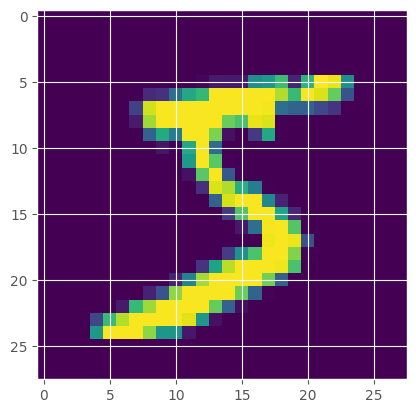

In [13]:
plt.imshow(single_image);

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
y_train.shape

(60000,)

In [24]:
#convert y_train and y_test to categorical features
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [19]:
y_cat_train.shape

(60000, 10)

In [26]:
#inspect y_example
y_cat_train 

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [25]:
#grab the first item
y_cat_train [0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
#we note the we have a 1 at index 5 

In [29]:
#inspect the min and max values
print(single_image.max())
print(single_image.min())

255
0


#### Normalize training data

In [31]:
#Normalize training data
#divide the data by the max value 
X_train = X_train/255
X_test = X_test/255

In [32]:
scaled_image = X_train[0]
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

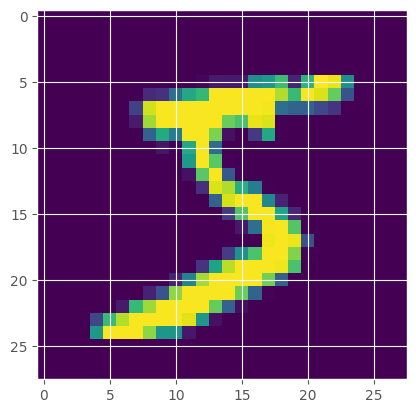

In [34]:
plt.imshow(scaled_image);

#### Reshape the data<br>
we need to add one more dimension to the data to let the CNN network  know that we are dealing with a single rgb channel

In [36]:
#batchsize, width, height,color_channel
X_train = X_train.reshape(60000, 28,28,1)

In [37]:
X_test.shape

(10000, 28, 28)

In [38]:
X_test = X_test.reshape(10000, 28,28,1)

#### modeling

In [42]:
model = Sequential()
#create the filtering kernel(convolutional layer)
model.add(Conv2D(filters=32,kernel_size=(4,4),
                input_shape=(28,28,1), activation='relu'))
#reduce the parameters using maxpool
model.add(MaxPool2D(pool_size=(2,2)))
#flatten the matrix into 1d array for last output
model.add(Flatten())
#add in a dense layer
model.add(Dense(128, activation='relu'))
#output layer
model.add(Dense(10, activation='softmax'))
#compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Training the model

In [44]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [48]:
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1389 - accuracy: 0.9578 - val_loss: 0.0524 - val_accuracy: 0.9822
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0465 - accuracy: 0.9856 - val_loss: 0.0471 - val_accuracy: 0.9842
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0293 - accuracy: 0.9905 - val_loss: 0.0376 - val_accuracy: 0.9876
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0197 - accuracy: 0.9939 - val_loss: 0.0438 - val_accuracy: 0.9860
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0140 - accuracy: 0.9952 - val_loss: 0.0402 - val_accuracy: 0.9881


#### Model Evaluation

In [49]:
metrics = pd.DataFrame(model.history.history)

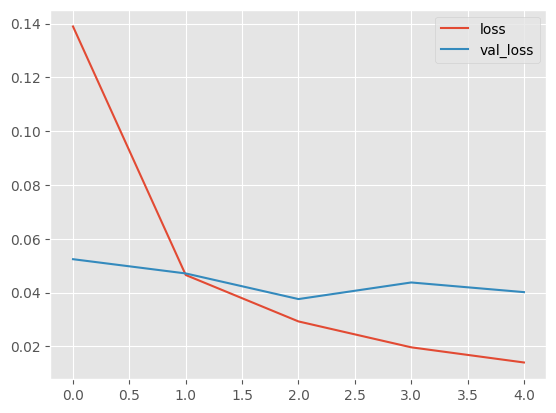

In [56]:
metrics[['loss','val_loss']].plot();

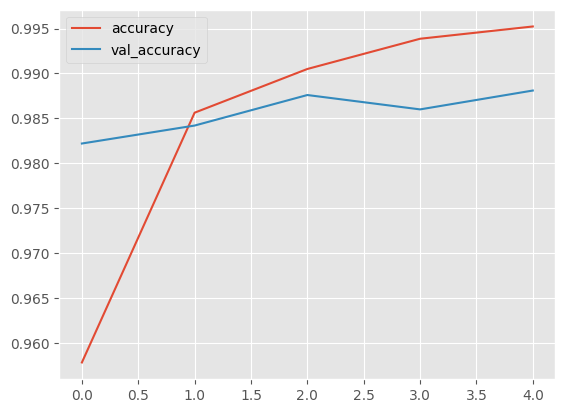

In [55]:
metrics[['accuracy','val_accuracy']].plot();

In [57]:
#check the metrics in the data
model.metrics_names

['loss', 'accuracy']

In [59]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.04018224775791168, 0.988099992275238]

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [90]:
print(classification_report(y_cat_test , predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



In [91]:
#make a prediction
my_number = X_test[0]

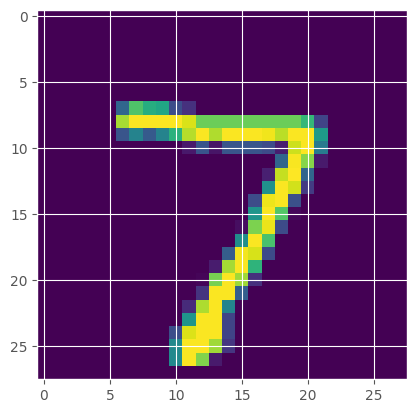

In [92]:
plt.imshow(my_number.reshape(28,28));

In [93]:
predicted_index = model.predict(my_number.reshape(1,28,28,1) > 0.5).astype("int32")

1/1 [==============================] - 0s 19ms/step


In [100]:
predicted_number = y_test[predicted_index.flatten()]

In [101]:
predicted_number

array([7, 7, 7, 7, 7, 7, 7, 2, 7, 7], dtype=uint8)